# Topic

::: {.notes}
AI can help us in a lot of sitiation. But we can implement simple statistics analisys and achive create results.
:::

## Heart Disease

- Cleveland
- Hungarian
- Switzerland
- Long Beach VA
- Statlog (Heart) Data Set.

::: {.notes}
This heart disease dataset is curated by combining 5 popular heart disease datasets already available independently
but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the
largest heart disease dataset available so far for research purposes.
:::

# Collecting/finding data

[Heart Disease Dataset](https://www.kaggle.com/datasets/mexwell/heart-disease-dataset)

::: {.notes}
Data set is taken from kaggle.
:::

## Dowloading dataset


{{< embed project.ipynb#download_dataset >}}



::: {.notes}
Dataset downloaded anutomaticly to local data folder. Make sure you set Kaggle  user name and authentication key.
:::

# Cleaning data/handling missing values

::: {.notes}
Lets explore dataset for most obvious errors
:::

## 

# Data analysis – attribute dependencies
# Creating a dashboard
# *Evaluation

# Collecting/finding data

In [40]:
#| code-fold: show
#| label: download_dataset
import kaggle

kaggle.api.authenticate()
kaggle.api.dataset_download_files(
    'mexwell/heart-disease-dataset', 
    path='data', 
    unzip=True
)

Dataset URL: https://www.kaggle.com/datasets/mexwell/heart-disease-dataset


# Load dataset

In [41]:
import pandas as pd 

data = pd.read_csv('data/heart_statlog_cleveland_hungary_final.csv')

# Clean dataset

In [42]:
#| code-fold: show
#| label: clean_data
coloms_to_remove = data.loc[
    (data['resting bp s']<10) | (data['ST slope']==0)
]
coloms_to_remove[['resting bp s', 'ST slope']]

,resting bp s,ST slope
450,0,2
517,150,0


In [43]:
data = data[data['resting bp s']>10]
data = data[data['ST slope']!=0]

# data analysis – attribute dependencies

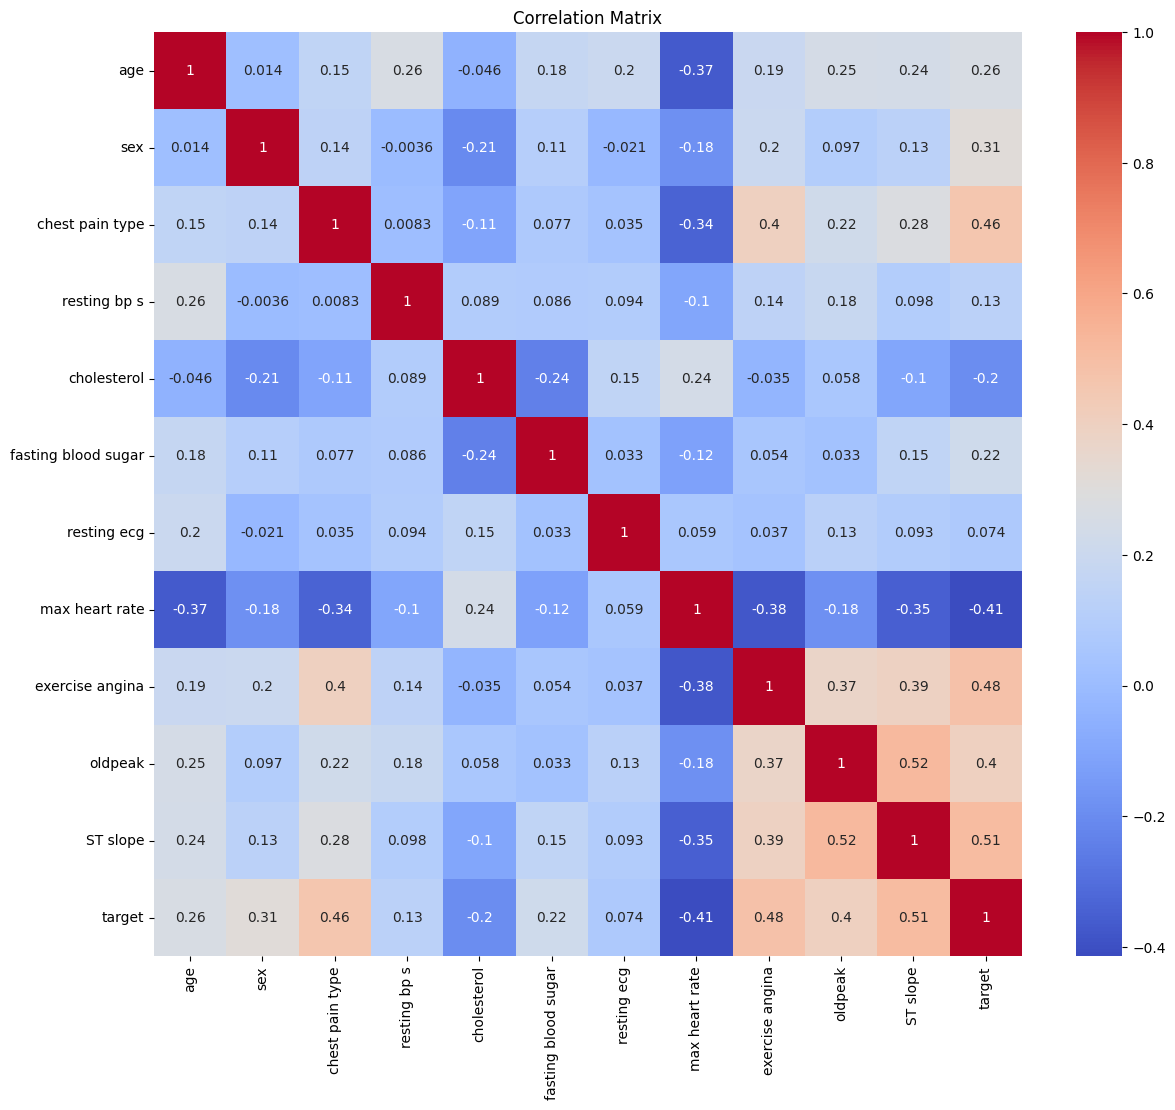

In [44]:
#| code-fold: false
#| label: heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,12))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Modeling and evaluation

In [45]:
#| code-fold: false
#| label: data_split
from sklearn.model_selection import train_test_split

X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
#| code-fold: false
#| label: data_preparation
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
#| code-fold: false
#| label: training_data

from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Naive Bayes': GaussianNB(),       
}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))

Training Logistic Regression...
Logistic Regression Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       112
           1       0.86      0.86      0.86       126

    accuracy                           0.85       238
   macro avg       0.85      0.85      0.85       238
weighted avg       0.85      0.85      0.85       238

Training Decision Tree...
Decision Tree Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       112
           1       0.90      0.83      0.86       126

    accuracy                           0.86       238
   macro avg       0.86      0.86      0.86       238
weighted avg       0.86      0.86      0.86       238

Training Random Forest...
Random Forest Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       112
           1       0.94      0.93      0.94       126

    a

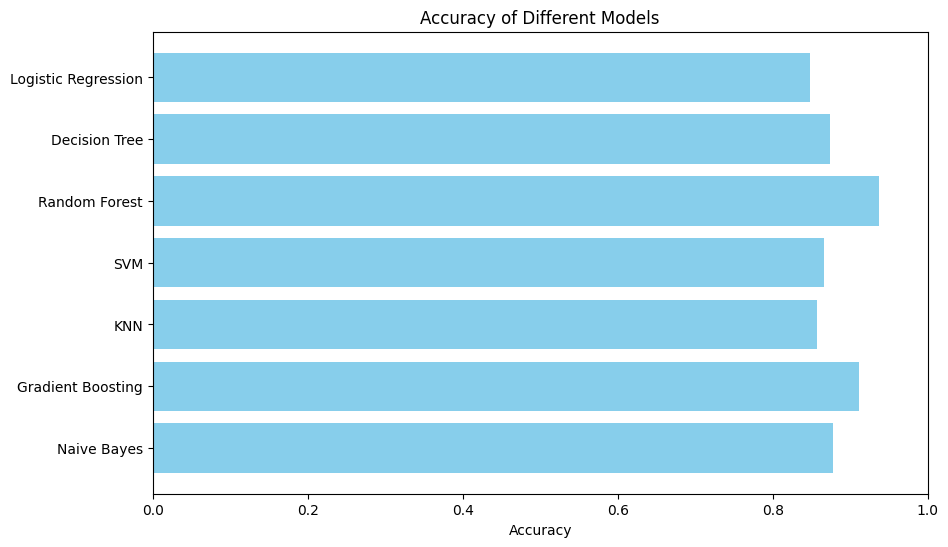

In [48]:
#| code-fold: false
#| label: accuracy_comparison
accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

# Create a bar plot for accuracies
plt.figure(figsize=(10, 6))
plt.barh(list(accuracies.keys()), list(accuracies.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xlim(0, 1)
plt.gca().invert_yaxis() 
plt.show()

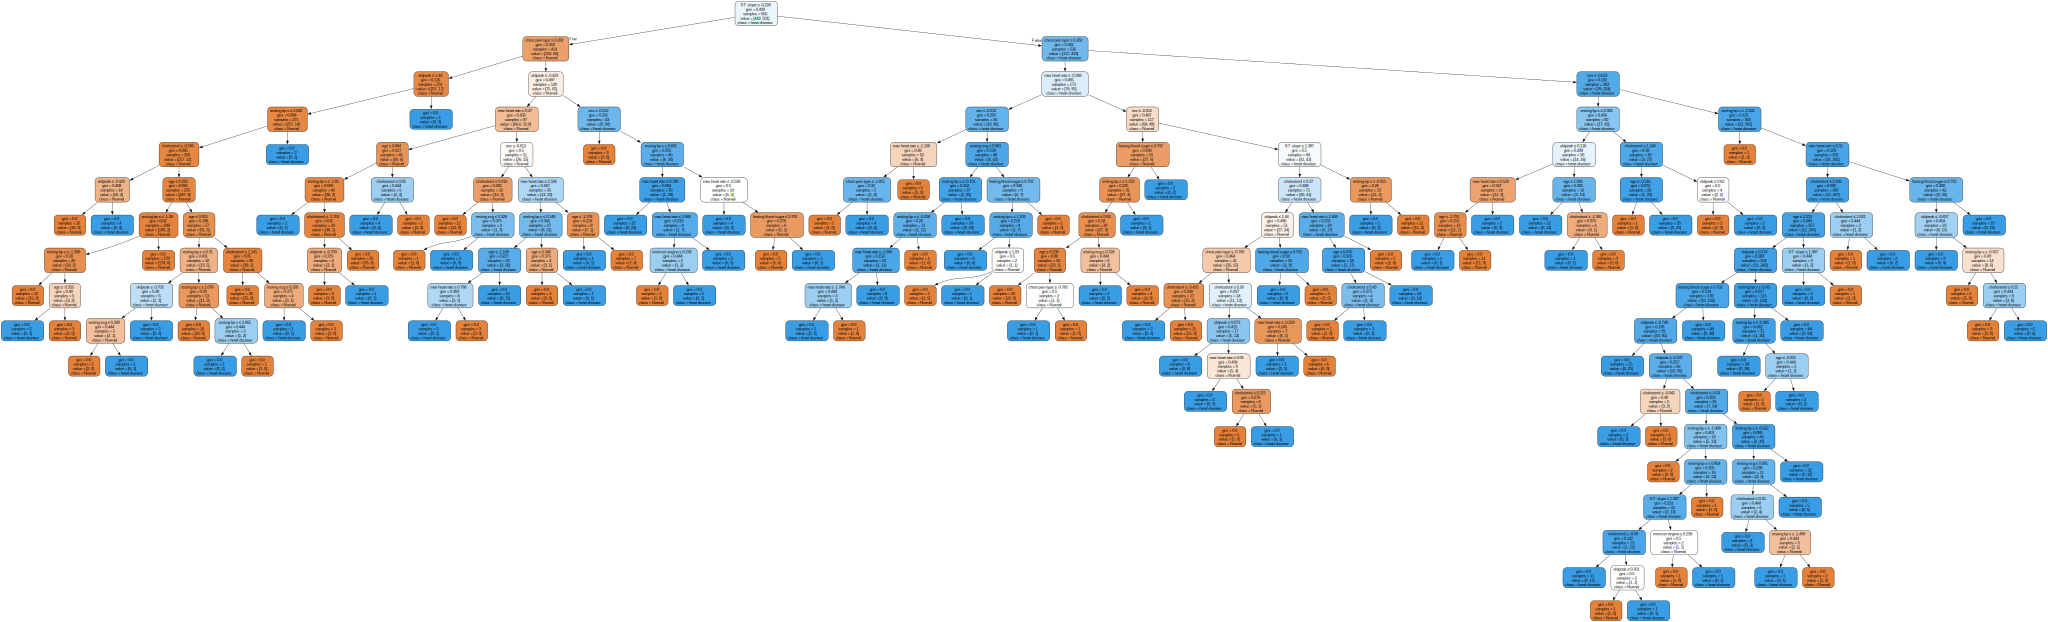

In [49]:
#| code-fold: true
#| label: tree
from sklearn import tree
import graphviz

model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
dot_data = tree.export_graphviz(model, out_file=None, 
                     feature_names=X.columns,  
                     class_names=['Normal','heart disease'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graphviz.Source(dot_data) 